In [1]:
#include <iostream>
#include <string>
#include <stdio.h>
#include <cmath>

In [2]:
TFile *file = TFile::Open("Tracks_Clusters.root"); 

In [3]:
TTree *tree = (TTree*) file->Get("JetRecoTree");
tree->Print()

******************************************************************************
*Tree    :JetRecoTree: JetRecoTree                                            *
*Entries :   102900 : Total =      3334789039 bytes  File  Size = 2227126936 *
*        :          : Tree compression factor =   1.50                       *
******************************************************************************
*Br    0 :EventNumber : EventNumber/l                                        *
*Entries :   102900 : Total  Size=     836872 bytes  File Size  =     448624 *
*Baskets :      127 : Basket Size=       7219 bytes  Compression=   1.86     *
*............................................................................*
*Br    1 :RunNumber : RunNumber/l                                            *
*Entries :   102900 : Total  Size=     836610 bytes  File Size  =      20416 *
*Baskets :      127 : Basket Size=       7219 bytes  Compression=  40.84     *
*..................................................

Event wieght is activated Why?, Also the variables of the jets: Reco, that goes for "reconstruction from the calorimeter", and Truth, that corresponds to jets formed by truth particles except of neutrinos, muons and non interacting particles.

In [4]:
float evtw = -1;
vector<float> *reco_R4_pt;
vector<float> *truth_R4_pt;

tree->SetBranchAddress("EventWeight", &evtw);
tree->SetBranchAddress("RecoJets_R4_pt", &reco_R4_pt);
tree->SetBranchAddress("TruthJets_R4_pt", &truth_R4_pt);

In [5]:
TCanvas *canvas = new TCanvas("Canvas","",800,600);

In [6]:
TH1F *hist_leadreco_pt = new TH1F("Lead Reco-jet","Leading jet pT; pT(GeV);Events",50,10,200);
TH1F *hist_reco_pt = new TH1F("Reco-jet","Jet pT; pT(GeV);Events",50,10,200);

In [7]:
int nentries, nbytes, i;
nentries = (Int_t)tree->GetEntries();

for (i = 0; i < nentries; i++)
{
    nbytes = tree->GetEntry(i);   
    if(reco_R4_pt->size()>0){
    hist_leadreco_pt->Fill(reco_R4_pt->at(0)/1000.,evtw); // we construct the lead reco from the high energy pt 
    for(int j=0; j<reco_R4_pt->size(); j++){
        hist_reco_pt->Fill(reco_R4_pt->at(j)/1000.,evtw);     
    }
    }
}

std::cout << "Done!" << std::endl;

Done!


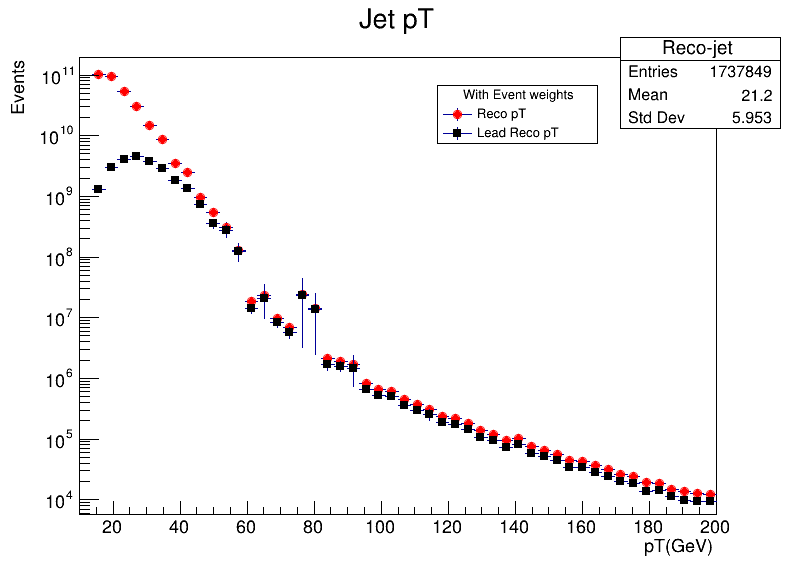

In [8]:
hist_reco_pt->SetMarkerStyle(20);
hist_reco_pt->SetMarkerColor(kRed);
hist_reco_pt->Draw("");
hist_leadreco_pt->SetMarkerStyle(21);
hist_leadreco_pt->Draw("same");
auto legend = new TLegend(0.75,0.85,0.55,0.75);
   legend->SetHeader("With Event weights","C");
   legend->AddEntry(hist_reco_pt,"Reco pT","lep");
   legend->AddEntry(hist_leadreco_pt,"Lead Reco pT","lep");
   legend->Draw();
canvas->SetLogy();
canvas->Draw();

Now we need to compare the leading truth jet pt with the leading reco jet pt with and without event weights.

First, the lead reco and lead truth with weight

In [9]:
TH1F *hist_leadtruth_pt = new TH1F("Lead Truth-jet","Leading jet pT; pT(GeV);Events",50,10,200);
TH1F *hist_truth_pt = new TH1F("Truth-jet","Jet pT; pT(GeV);Events",50,10,200);

In [10]:
int nentries, nbytes, i;
nentries = (Int_t)tree->GetEntries();

for (i = 0; i < nentries; i++)
{
    nbytes = tree->GetEntry(i);   
    if(truth_R4_pt->size()>0){
    hist_leadtruth_pt->Fill(truth_R4_pt->at(0)/1000.,evtw);  
    for(int j=0; j<truth_R4_pt->size(); j++){
        hist_truth_pt->Fill(truth_R4_pt->at(j)/1000.,evtw);     
    }
    }
}

std::cout << "Done!" << std::endl;

Done!


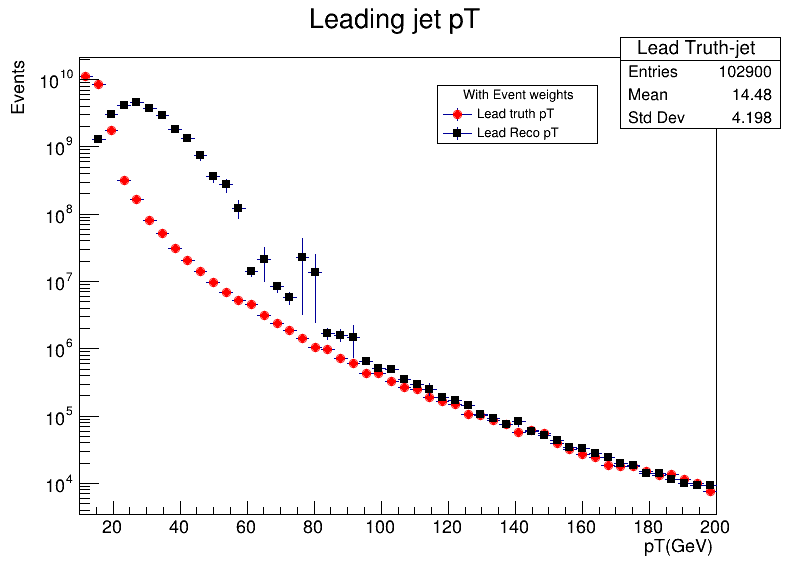

In [11]:
hist_leadtruth_pt->SetMarkerStyle(20);
hist_leadtruth_pt->SetMarkerColor(kRed);
hist_leadtruth_pt->Draw("");
hist_leadreco_pt->SetMarkerStyle(21);
hist_leadreco_pt->Draw("same");
auto legend = new TLegend(0.75,0.85,0.55,0.75);
   legend->SetHeader("With Event weights","C");
   legend->AddEntry(hist_leadtruth_pt,"Lead truth pT","lep");
   legend->AddEntry(hist_leadreco_pt,"Lead Reco pT","lep");
   legend->Draw();
canvas->SetLogy();
canvas->Draw();

Now lead truth vs lead reco without event weight

In [12]:
TtruthH1F *hist_leadtruth_pt_nowe = new TH1F("Lead Truth-jet no weight","Leading jet pT; pT(GeV);Events",50,10,200);
TH1F *hist_leadreco_pt_nowe = new TH1F("Lead Reco-jet no weight","Leading jet pT; pT(GeV);Events",50,10,200);
TH1F *hist_truth_pt_nowe = new TH1F("Truth-jet no weight"," jet pT; pT(GeV);Events",50,10,200);
TH1F *hist_reco_pt_nowe = new TH1F("Reco-jet no weight"," jet pT; pT(GeV);Events",50,10,200);

In [13]:
int nentries, nbytes, i;
nentries = (Int_t)tree->GetEntries();

for (i = 0; i < nentries; i++)
{
    nbytes = tree->GetEntry(i);   
    if(truth_R4_pt->size()>0){
    hist_leadtruth_pt_nowe->Fill(truth_R4_pt->at(0)/1000.); 
    for(int j=0; j<truth_R4_pt->size(); j++){
    hist_truth_pt_nowe->Fill(truth_R4_pt->at(j)/1000.);     
    }
    }
}

std::cout << "Done!" << std::endl;

Done!


In [14]:
int nentries, nbytes, i;
nentries = (Int_t)tree->GetEntries();

for (i = 0; i < nentries; i++)
{
    nbytes = tree->GetEntry(i);   
    if(reco_R4_pt->size()>0){
    hist_leadreco_pt_nowe->Fill(reco_R4_pt->at(0)/1000.);
    for(int j=0; j<reco_R4_pt->size(); j++){
    hist_reco_pt_nowe->Fill(reco_R4_pt->at(j)/1000.);     
    }
    }
}
std::cout << "Done!" << std::endl;

Done!


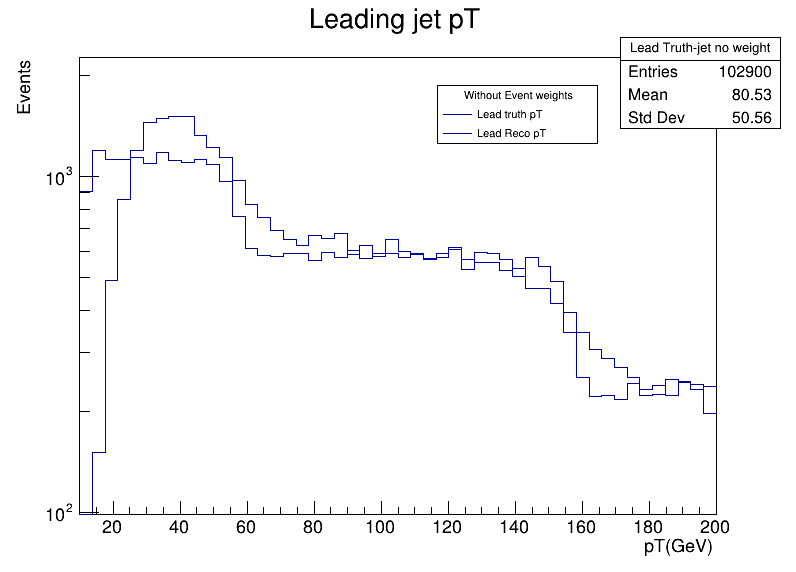

In [17]:
hist_leadtruth_pt_nowe->SetMarkerStyle(20);
hist_leadtruth_pt_nowe->SetMarkerColor(kRed);
hist_leadtruth_pt_nowe->Draw("");
hist_leadreco_pt_nowe->SetMarkerStyle(21);
hist_leadreco_pt->SetMarkerColor(kBlue);
hist_leadreco_pt_nowe->Draw("same");
auto legend = new TLegend(0.75,0.85,0.55,0.75);
   legend->SetHeader("Without Event weights","C"); // option "C" allows to center the header
   legend->AddEntry(hist_leadtruth_pt_nowe,"Lead truth pT","l");
   legend->AddEntry(hist_leadreco_pt_nowe,"Lead Reco pT","l");
   legend->Draw();
canvas->SetLogy();
canvas->Draw();

Now we'll compare for all the jets pT

First reco and truth with weight

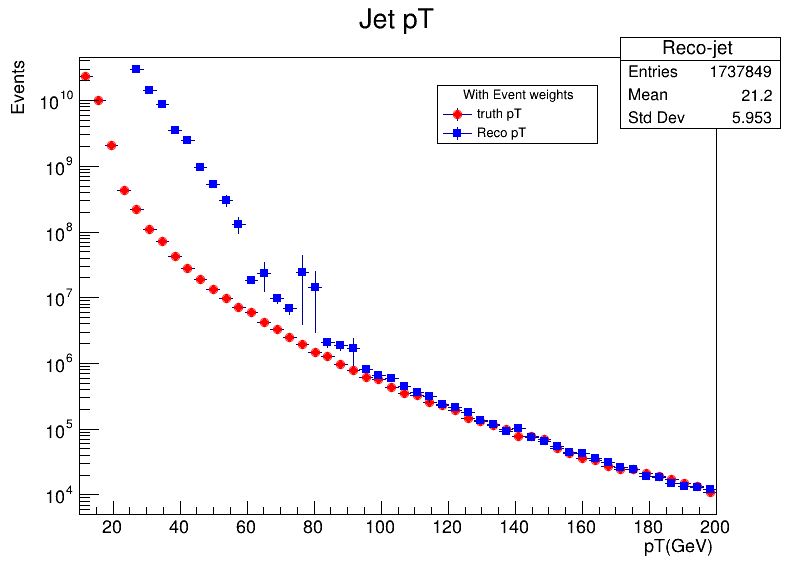

In [21]:
hist_truth_pt->SetMarkerStyle(20);
hist_truth_pt->SetMarkerColor(kRed);
hist_truth_pt->Draw("");
hist_reco_pt->SetMarkerStyle(21);
hist_reco_pt->SetMarkerColor(kBlue);
hist_reco_pt->Draw("same");
auto legend = new TLegend(0.75,0.85,0.55,0.75);
   legend->SetHeader("With Event weights","C"); // option "C" allows to center the header
   legend->AddEntry(hist_truth_pt,"truth pT","lep");
   legend->AddEntry(hist_reco_pt,"Reco pT","lep");
   legend->Draw();
canvas->SetLogy();
canvas->Draw();

Then, reco and truth without weight

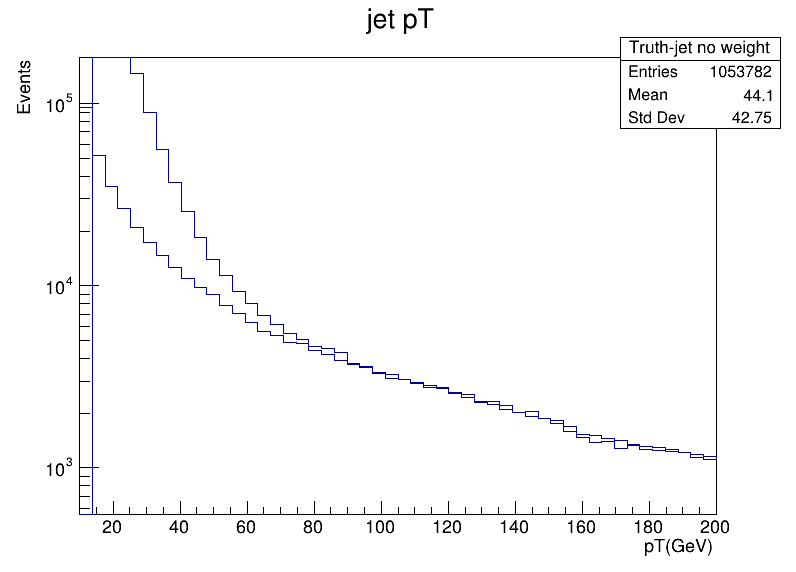

In [22]:
hist_truth_pt_nowe->SetMarkerStyle(20);
hist_truth_pt_nowe->SetMarkerColor(kRed);
hist_truth_pt_nowe->Draw("");
hist_reco_pt_nowe->SetMarkerStyle(21);
hist_reco_pt_nowe->Draw("same");
canvas->SetLogy();
canvas->Draw();

Now we will study the jets pileup dependence. Pileup is defined as the average number of particle interactions per bunch-crossing 

In [5]:
UInt_t npv = -1;
tree->SetBranchAddress("NPV", &npv);

float mu = -1;
tree->SetBranchAddress("mu_average", &mu);

Plot jet vs plot pileup

In [24]:
TH2F *hist_jetpt_npv = new TH2F("Reco-jet pT vs. NPV",";NPV; jet pT",50,1,50, 20, 0, 200);
TProfile *prof_jetpt_npv = new TProfile("Profile Reco-jet pT vs. NPV",";NPV; jet pT",50,1,50, 0, 200);

Fill the histograms with a cut to accept events with at least one jet and require the leading jet to have pT above 20 GeV

In [25]:
int nentries, nbytes, i;
nentries = (Int_t)tree->GetEntries();

for (i = 0; i < nentries; i++)
{
    nbytes = tree->GetEntry(i);

    if(reco_R4_pt->size()!=0 && reco_R4_pt->at(0)>20000.){
        for(int j=0; j<reco_R4_pt->size(); j++){
        hist_jetpt_npv->Fill(reco_R4_pt->at(j)/1000.,npv,evtw);
        prof_jetpt_npv->Fill(reco_R4_pt->at(j)/1000.,npv,evtw);
        }
    }
}

std::cout << "Done!" << std::endl;

Done!


In [26]:
TCanvas *canvas2 = new TCanvas("Canvas2","",800,600);

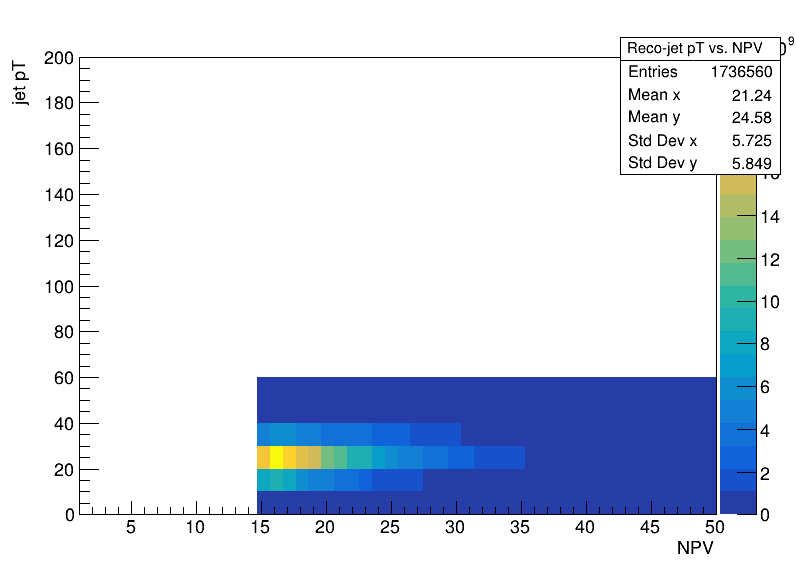

In [27]:
hist_jetpt_npv->Draw("colz");
canvas2->Draw();

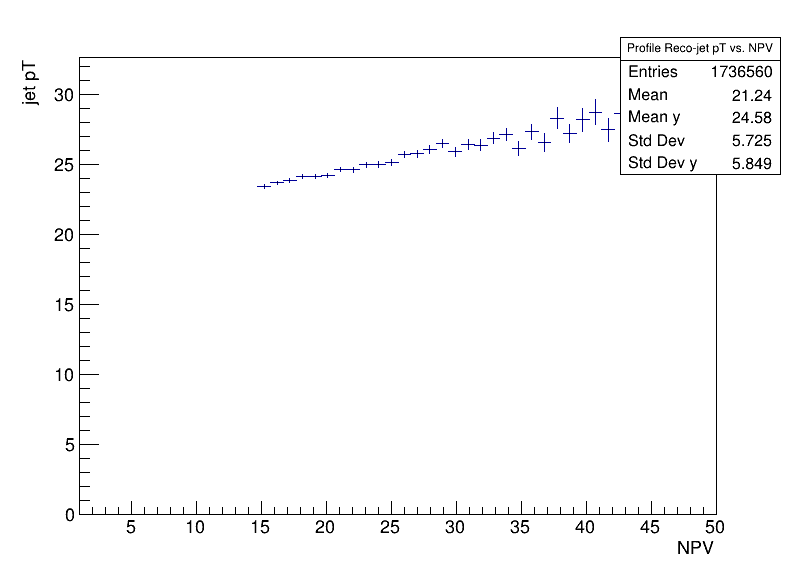

In [28]:
prof_jetpt_npv->Draw("");
canvas2->Draw();

In excercise 3 we Make the plot of truth jet pT vs. pileup.  

In [27]:
TH2F *hist_truthjetpt_npv = new TH2F("Truth-jet pT vs. mu average",";mu average; jet pT",50,1,50, 20, 0, 200);
TProfile *prof_truthjetpt_npv = new TProfile("Profile Truth-jet pT vs. mu average",";mu average; jet pT",50,1,50, 0, 200);

In [28]:
int nentries, nbytes, i;
nentries = (Int_t)tree->GetEntries();

for (i = 0; i < nentries; i++)
{
    nbytes = tree->GetEntry(i);

    if(truth_R4_pt->size()!=0 && truth_R4_pt->at(0)>20000.){
        for(int j=0; j<truth_R4_pt->size(); j++){
        hist_truthjetpt_npv->Fill(truth_R4_pt->at(j)/1000.,mu,evtw);
        prof_truthjetpt_npv->Fill(truth_R4_pt->at(j)/1000.,mu,evtw);
        }
    }
}

std::cout << "Done!" << std::endl;

Done!


In [8]:
TCanvas *canvas2 = new TCanvas("Canvas2","",800,600);

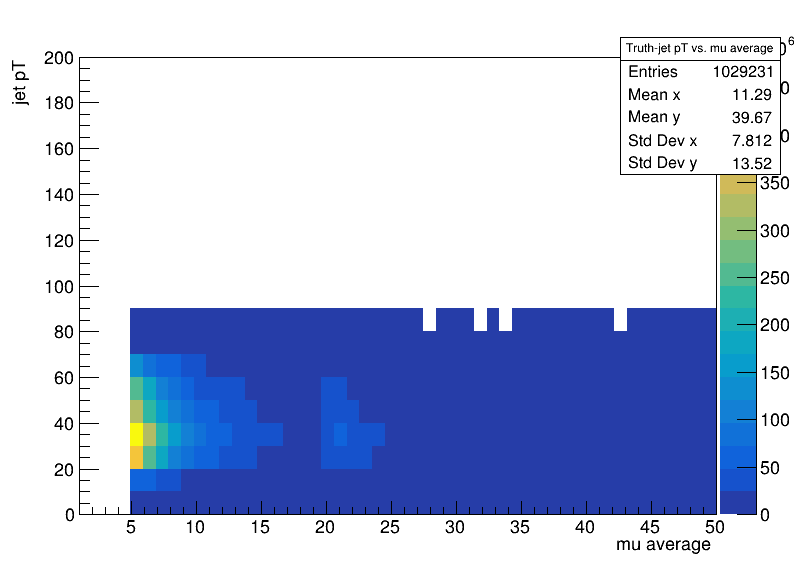

In [30]:
hist_truthjetpt_npv->Draw("colz");
canvas2->Draw();

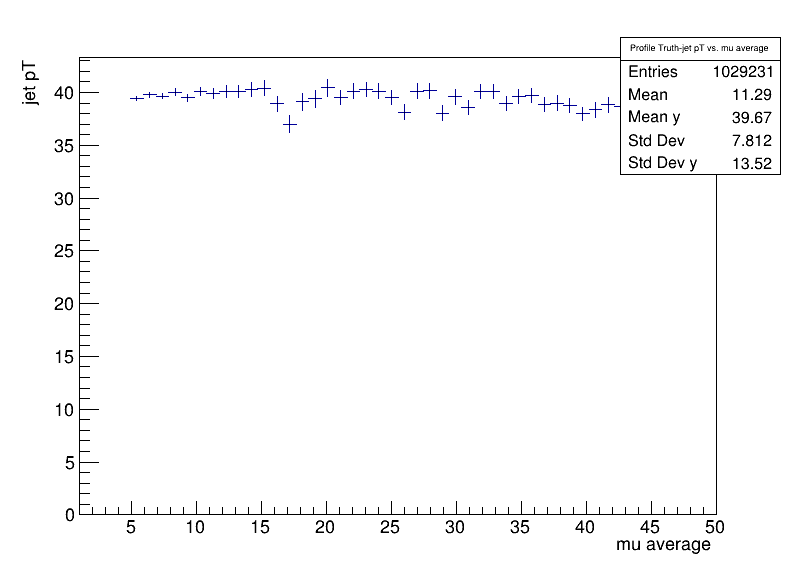

In [31]:
prof_truthjetpt_npv->Draw("");
canvas2->Draw();

Now we plot the jvf variable (Jet vertex fraction)

In [6]:
vector<float> *reco_R4_jvf;

tree->SetBranchAddress("RecoJets_R4_jvf", &reco_R4_jvf);

In [33]:
TH1F *hist_leadreco_jvf = new TH1F("Lead Reco-jet JVF","Leading jet JVF; JVF;Events",20,-1,1);
TH1F *hist_leadreco100_jvf = new TH1F("Lead Reco-jet JVF","Leading jet JVF; JVF;Events",20,-1,1);

Warning in <TFile::Append>: Replacing existing TH1: Lead Reco-jet JVF (Potential memory leak).


In [34]:
int nentries, nbytes, i;
nentries = (Int_t)tree->GetEntries();

for (i = 0; i < nentries; i++)
{
    nbytes = tree->GetEntry(i);

    if(reco_R4_pt->size()!=0 && reco_R4_pt->at(0)>20000.){
        hist_leadreco_jvf->Fill(reco_R4_jvf->at(0), evtw);
        if(reco_R4_pt->at(0)>100000.){hist_leadreco100_jvf->Fill(reco_R4_jvf->at(0), evtw);}
        
    }
}

std::cout << "Done!" << std::endl;

Done!


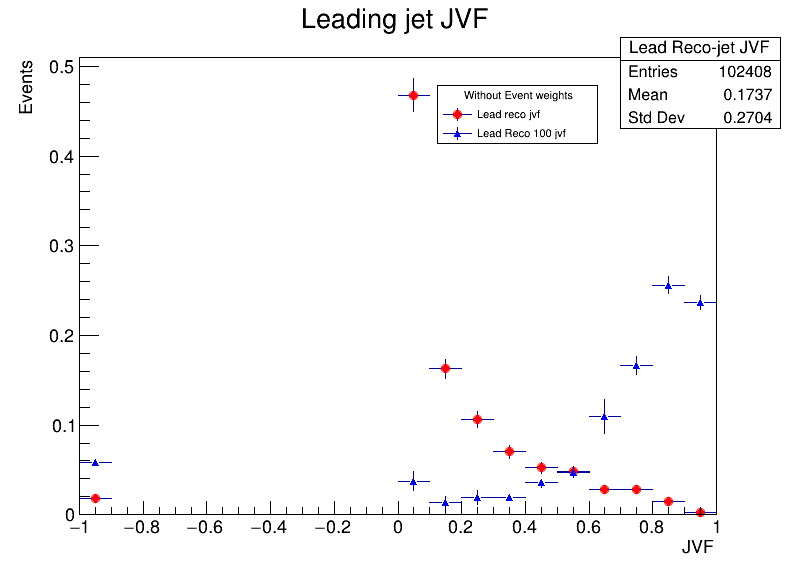

In [35]:
hist_leadreco_jvf->SetMarkerStyle(20);
hist_leadreco_jvf->SetMarkerColor(kRed);
hist_leadreco_jvf->DrawNormalized("");
hist_leadreco100_jvf->SetMarkerStyle(22);
hist_leadreco100_jvf->SetMarkerColor(kBlue);
hist_leadreco100_jvf->DrawNormalized("same");
auto legend = new TLegend(0.75,0.85,0.55,0.75);
   legend->SetHeader("Without Event weights","C"); // option "C" allows to center the header
   legend->AddEntry(hist_leadreco_jvf,"Lead reco jvf","lep");
   legend->AddEntry(hist_leadreco100_jvf,"Lead Reco 100 jvf","lep");
   legend->Draw();
canvas2->Draw();

Excercise 4-5: Now we use a |JVF|>0.5 cut in the lead reco jets to compare with the leading reco jet pT (without cut), the leading truth jets (without cut) and the leading tracks jets (without cut).
   

In [7]:
vector<float> *track_R4_pt;
tree->SetBranchAddress("TrackJets_R4_pt", &track_R4_pt);

In [8]:
TCanvas *canvas3 = new TCanvas("Canvas3","",800,600);

In [9]:
TH1F *hist_leadreco_pt_cut = new TH1F("Lead Reco jet with jvf>0.5","Leading reco jet pT; pT(GeV);Events",50,10,200);
TH1F *hist_leadreco_pt_nocut = new TH1F("Lead reco-jet","Leading reco jet pT; pT(GeV);Events",50,10,200);
TH1F *hist_leadtruth_pt_nocut = new TH1F("Lead Truth-jet","Leading truth jet pT; pT(GeV);Events",50,10,200);
TH1F *hist_leadtracks_pt_nocut = new TH1F("Lead Tracks-jet","Leading tracks jet pT; pT(GeV);Events",50,10,200);

In [14]:
int nentries, nbytes, i;
nentries = (Int_t)tree->GetEntries();

std::cout << nentries << std::endl;

for (i = 0; i < nentries; i++)
{
    nbytes = tree->GetEntry(i);  
    if(fabs(reco_R4_jvf->at(0))>0.5){
    hist_leadreco_pt_cut->Fill(reco_R4_pt->at(0)/1000.,evtw);}
    if(reco_R4_pt->size()>0){
    hist_leadreco_pt_nocut->Fill(reco_R4_pt->at(0)/1000.,evtw);}
    if(truth_R4_pt->size()>0){
    hist_leadtruth_pt_nocut->Fill(truth_R4_pt->at(0)/1000.,evtw);}
    if(track_R4_pt->size()>0){
    hist_leadtracks_pt_nocut->Fill(track_R4_pt->at(0)/1000.,evtw);}
}

std::cout << "Done1!" << std::endl;

102900


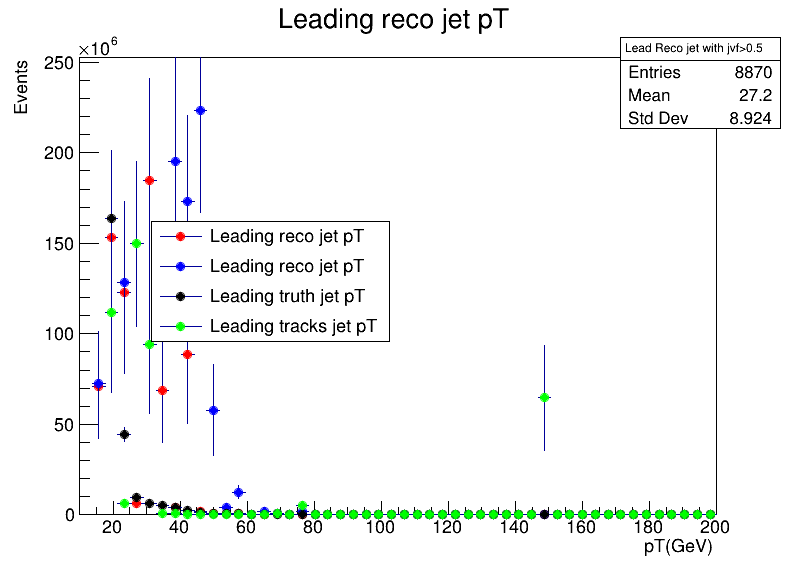

In [19]:
hist_leadreco_pt_cut->SetMarkerStyle(20);
hist_leadreco_pt_cut->SetMarkerColor(kRed);
hist_leadreco_pt_cut->Draw("");
hist_leadreco_pt_nocut->SetMarkerStyle(20);
hist_leadreco_pt_nocut->SetMarkerColor(kBlue);
hist_leadreco_pt_nocut->Draw("SAME");
hist_leadtruth_pt_nocut->SetMarkerStyle(20);
hist_leadtruth_pt_nocut->SetMarkerColor(kBlack);
hist_leadtruth_pt_nocut->Draw("SAME");
hist_leadtracks_pt_nocut->SetMarkerStyle(20);
hist_leadtracks_pt_nocut->SetMarkerColor(kGreen);
hist_leadtracks_pt_nocut->Draw("SAME");
canvas3->BuildLegend();
canvas3->Draw();

Now we will study the jet response: the ratio between the pT of the jet to the truth jet. First we should "match" the jets and the truth jets. We will use the distance DeltaR between the two, but first we should define them as four-vectors:

In [9]:
vector<float> *reco_R4_eta;
vector<float> *reco_R4_phi;
vector<float> *reco_R4_m;

vector<float> *truth_R4_eta;
vector<float> *truth_R4_phi;
vector<float> *truth_R4_m;

tree->SetBranchAddress("RecoJets_R4_eta", &reco_R4_eta);
tree->SetBranchAddress("RecoJets_R4_phi", &reco_R4_phi);
tree->SetBranchAddress("RecoJets_R4_m", &reco_R4_m);
tree->SetBranchAddress("TruthJets_R4_eta", &truth_R4_eta);
tree->SetBranchAddress("TruthJets_R4_phi", &truth_R4_phi);
tree->SetBranchAddress("TruthJets_R4_m", &truth_R4_m);

In [16]:
TH1F *hist_DR_reco_truth = new TH1F("Delta R reco","Delta R; #Delta R; Events",20,0,2);

In [17]:
int nentries, nbytes, i;
nentries = (Int_t)tree->GetEntries();

for (i = 0; i < nentries; i++)
{
    nbytes = tree->GetEntry(i);

    if(truth_R4_pt->size()!=0 && truth_R4_pt->at(0)>20000.){
    TLorentzVector truthJet;
    truthJet.SetPtEtaPhiM(truth_R4_pt->at(0),truth_R4_eta->at(0),truth_R4_phi->at(0),truth_R4_m->at(0));        
    if(reco_R4_pt->size()!=0 && fabs(reco_R4_jvf->at(0))>0.5){
    TLorentzVector recoJet;
    recoJet.SetPtEtaPhiM(reco_R4_pt->at(0),reco_R4_eta->at(0),reco_R4_phi->at(0),reco_R4_m->at(0));        
 
        //Plot the Delta R
        hist_DR_reco_truth->Fill(truthJet.DeltaR(recoJet),evtw);
    }
    }
}

std::cout << "Done!" << std::endl;


Done!


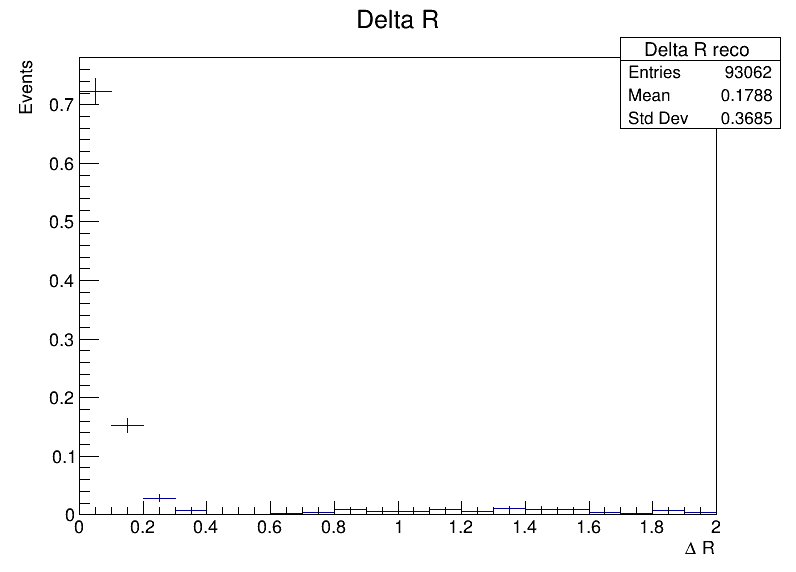

In [21]:
hist_DR_reco_truth->Scale(1/hist_DR_reco_truth->Integral());if(reco_R4_pt->size()!=0){
        TLorentzVector recoJet;
        recoJet.SetPtEtaPhiM(reco_R4_pt->at(0),reco_R4_eta->at(0),reco_R4_phi->at(0),reco_R4_m->at(0));
        if(truth_R4_pt->size()!=0 && truth_R4_pt->at(0)>20000.){
            TLorentzVector truthJet;
            truthJet.SetPtEtaPhiM(truth_R4_pt->at(0),truth_R4_eta->at(0),truth_R4_phi->at(0),truth_R4_m->at(0));
            if(fabs(truthJet.DeltaR(recoJet))<0.3){
                hist_DR_truth20->Fill(reco_R4_pt->at(0)/truth_R4_pt->at(0),evtw);
            }
hist_DR_reco_truth->DrawNormalized("");
canvas2->Draw();

Excercise 6: We want to repeat the comparison with truth jets in the next three cases: reco-jets with and without the JVF cut, and track-jets

In [10]:
vector<float> *track_R4_eta;
vector<float> *track_R4_phi;
vector<float> *track_R4_m;
tree->SetBranchAddress("TrackJets_R4_eta", &track_R4_eta);
tree->SetBranchAddress("TrackJets_R4_phi", &track_R4_phi);
tree->SetBranchAddress("TrackJets_R4_m", &track_R4_m);

In [23]:
TH1F *hist_DR_track_truth = new TH1F("Delta R track","Delta R; #Delta R; Events",20,0,2);

In [24]:
int nentries, nbytes, i;
nentries = (Int_t)tree->GetEntries();

for (i = 0; i < nentries; i++)
{
    nbytes = tree->GetEntry(i);

    if(truth_R4_pt->size()!=0 && truth_R4_pt->at(0)>20000.){
    TLorentzVector truthJet;
    truthJet.SetPtEtaPhiM(truth_R4_pt->at(0),truth_R4_eta->at(0),truth_R4_phi->at(0),truth_R4_m->at(0));        
    if(track_R4_pt->size()!=0){
    TLorentzVector recoJet;
    recoJet.SetPtEtaPhiM(track_R4_pt->at(0),track_R4_eta->at(0),track_R4_phi->at(0),track_R4_m->at(0));        
 
        //Plot the Delta R
        hist_DR_reco_truth->Fill(truthJet.DeltaR(recoJet),evtw);
    }
    }
}

std::cout << "Done!" << std::endl;

Done!


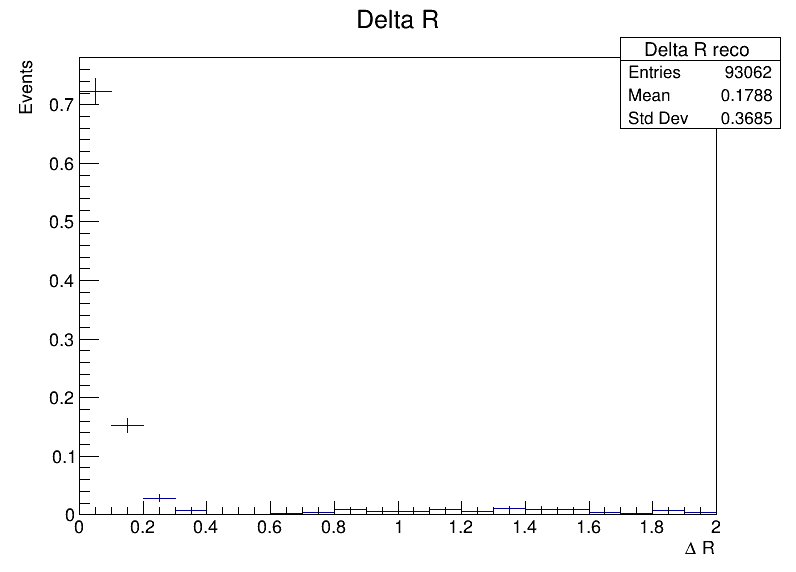

Error in <TH1F::DrawNormalized>: Sum of weights is null. Cannot normalize histogram: Delta R track
Info in <TCanvas::BuildLegend(void)>: No object to build a TLegend.


In [28]:
hist_DR_track_truth->Scale(1/hist_DR_reco_truth->Integral());
hist_DR_track_truth->DrawNormalized("");
canvas2->Draw();

In [29]:
TH1F *hist_DR_reco_truth_nocut = new TH1F("Delta R reco","Delta R; #Delta R; Events",20,0,2);

Warning in <TFile::Append>: Replacing existing TH1: Delta R reco (Potential memory leak).


In [31]:
int nentries, nbytes, i;
nentries = (Int_t)tree->GetEntries();

for (i = 0; i < nentries; i++)
{
    nbytes = tree->GetEntry(i);

    if(truth_R4_pt->size()!=0 && truth_R4_pt->at(0)>20000.){
    TLorentzVector truthJet;
    truthJet.SetPtEtaPhiM(truth_R4_pt->at(0),truth_R4_eta->at(0),truth_R4_phi->at(0),truth_R4_m->at(0));        
    if(reco_R4_pt->size()!=0){
    TLorentzVector recoJet;
    recoJet.SetPtEtaPhiM(reco_R4_pt->at(0),reco_R4_eta->at(0),reco_R4_phi->at(0),reco_R4_m->at(0));        
 
        //Plot the Delta R
        hist_DR_reco_truth_nocut->Fill(truthJet.DeltaR(recoJet),evtw);
    }
    }
}

std::cout << "Done!" << std::endl;


Done!


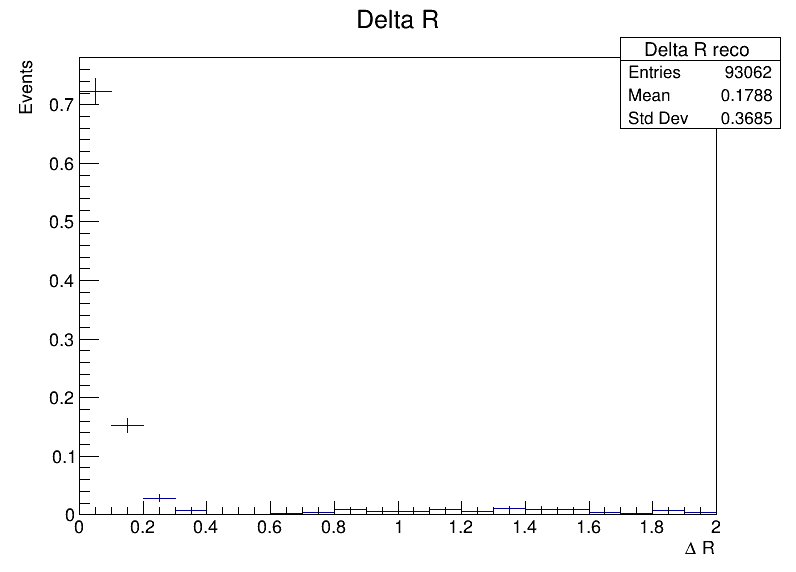

In [34]:
hist_DR_reco_truth_nocut->Scale(1/hist_DR_reco_truth->Integral());
hist_DR_reco_truth_nocut->DrawNormalized("");
canvas2->Draw();

Excercise 7. Plot the response: For matched jets (use DeltaR<0.3), plot pTjet/pTtruth for 3 cases: truth_pT>20 GeV, 100 GeV, 500 GeV. Do this for track jets and reco jets (two plots).

In [11]:
TH1F *hist_DR_reco_truth_20 = new TH1F("Delta R reco jets 20","Delta R; #Delta R; Events",20,0,2);
TH1F *hist_DR_reco_truth_100 = new TH1F("Delta R reco jets 100","Delta R; #Delta R; Events",20,0,2);

In [12]:
int nentries, nbytes, i;
nentries = (Int_t)tree->GetEntries();

for (i = 0; i < nentries; i++)
{
    nbytes = tree->GetEntry(i);

        if(reco_R4_pt->size()!=0){
        TLorentzVector recoJet;
        recoJet.SetPtEtaPhiM(reco_R4_pt->at(0),reco_R4_eta->at(0),reco_R4_phi->at(0),reco_R4_m->at(0));
        if(truth_R4_pt->size()!=0 && truth_R4_pt->at(0)>20000.){
        TLorentzVector truthJet;
        truthJet.SetPtEtaPhiM(truth_R4_pt->at(0),truth_R4_eta->at(0),truth_R4_phi->at(0),truth_R4_m->at(0));
        if(fabs(truthJet.DeltaR(recoJet))<0.3){
        hist_DR_reco_truth_20->Fill(reco_R4_pt->at(0)/truth_R4_pt->at(0),evtw);
        }
        }
        }
        if(reco_R4_pt->size()!=0){
        TLorentzVector recoJet;
        recoJet.SetPtEtaPhiM(reco_R4_pt->at(0),reco_R4_eta->at(0),reco_R4_phi->at(0),reco_R4_m->at(0));
        if(truth_R4_pt->size()!=0 && truth_R4_pt->at(0)>100000.){
        TLorentzVector truthJet;
        truthJet.SetPtEtaPhiM(truth_R4_pt->at(0),truth_R4_eta->at(0),truth_R4_phi->at(0),truth_R4_m->at(0));
        if(fabs(truthJet.DeltaR(recoJet))<0.3){
        hist_DR_reco_truth_100->Fill(reco_R4_pt->at(0)/truth_R4_pt->at(0),evtw);
        }
    }
    }
}
std::cout << "Done!" << std::endl;

Done!


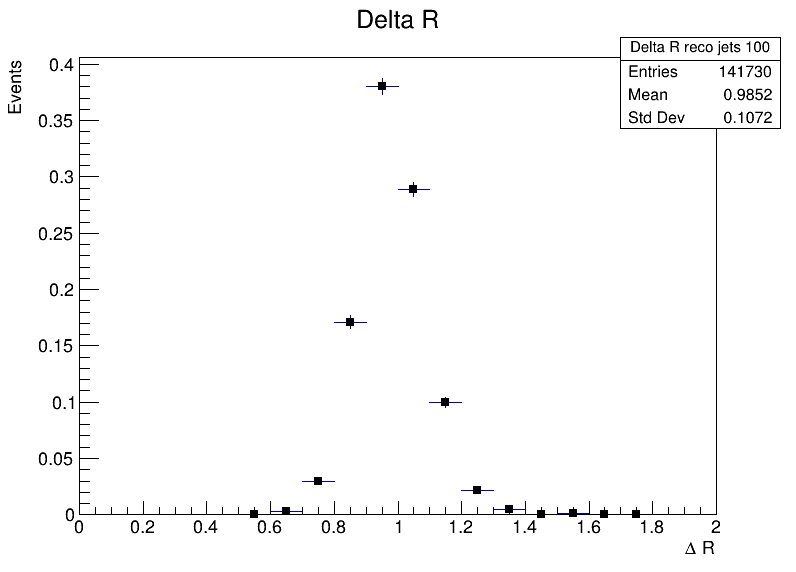

In [25]:
hist_DR_reco_truth_100->Scale(1/hist_DR_reco_truth_100->Integral());
hist_DR_reco_truth_100->DrawNormalized("");
canvas2->Draw();

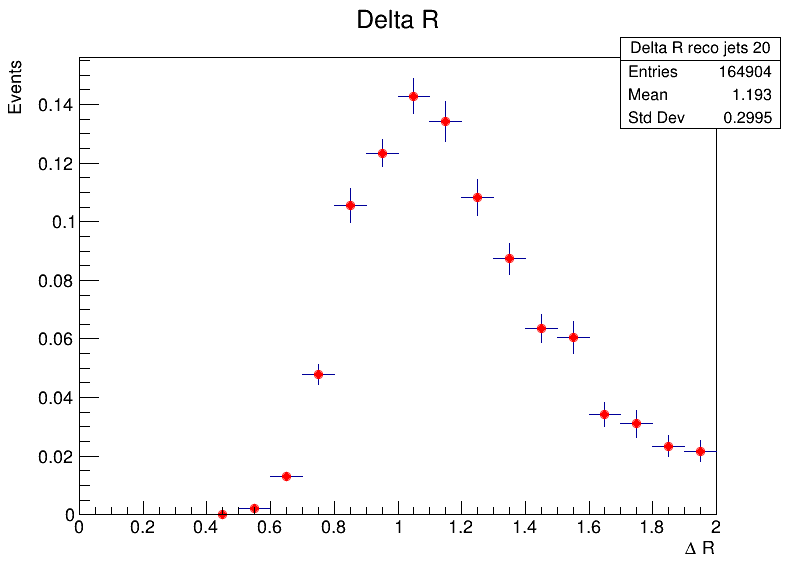

In [29]:
hist_DR_reco_truth_20->Scale(1/hist_DR_reco_truth_20->Integral());
hist_DR_reco_truth_20->DrawNormalized("");
canvas2->Draw();

In [13]:
TH1F *hist_DR_reco_truth_500 = new TH1F("Delta R reco jets 500","Delta R; #Delta R; Events",20,0,2);

In [14]:
int nentries, nbytes, i;
nentries = (Int_t)tree->GetEntries();

for (i = 0; i < nentries; i++)
{
    nbytes = tree->GetEntry(i);

        if(reco_R4_pt->size()!=0){
        TLorentzVector recoJet;
        recoJet.SetPtEtaPhiM(reco_R4_pt->at(0),reco_R4_eta->at(0),reco_R4_phi->at(0),reco_R4_m->at(0));
        if(truth_R4_pt->size()!=0 && truth_R4_pt->at(0)>500000.){
        TLorentzVector truthJet;
        truthJet.SetPtEtaPhiM(truth_R4_pt->at(0),truth_R4_eta->at(0),truth_R4_phi->at(0),truth_R4_m->at(0));
        if(fabs(truthJet.DeltaR(recoJet))<0.3){
        hist_DR_reco_truth_500->Fill(reco_R4_pt->at(0)/truth_R4_pt->at(0),evtw);
        }
}
        }
}
std::cout << "Done!" << std::endl;

Done!


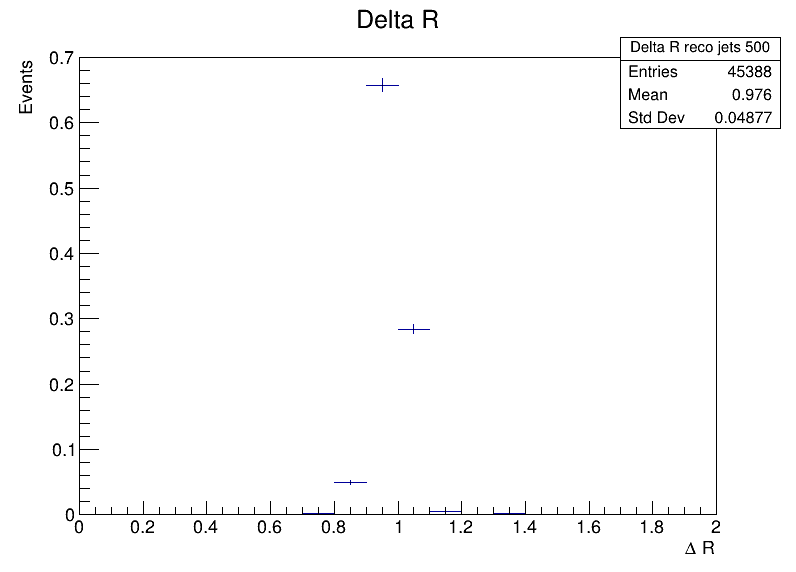

In [30]:
hist_DR_reco_truth_500->Scale(1/hist_DR_reco_truth_500->Integral());
hist_DR_reco_truth_500->DrawNormalized("");
canvas2->Draw();

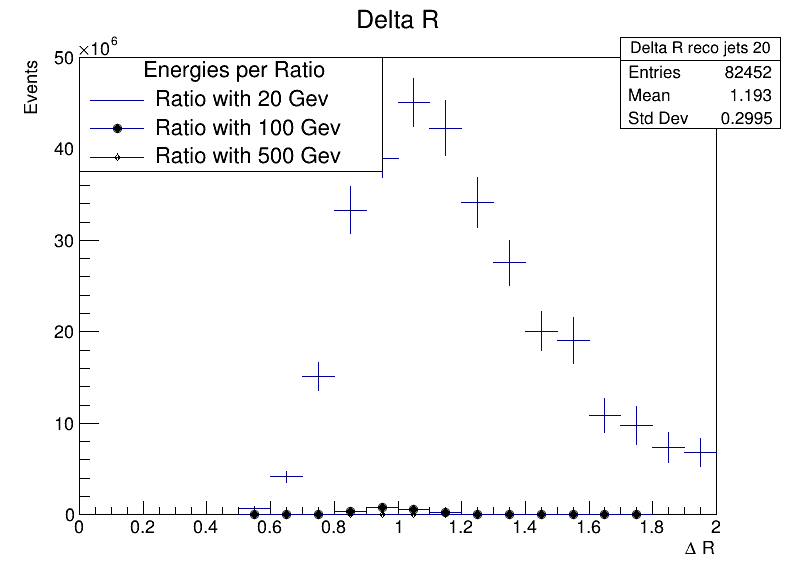

In [17]:
  hist_DR_reco_truth_20->Draw("");
  hist_DR_reco_truth_100->Draw("same");
  hist_DR_reco_truth_100->SetMarkerStyle(20);
  hist_DR_reco_truth_500->Draw("same");
  hist_DR_reco_truth_500->SetMarkerStyle(42);
  auto legend = new TLegend(0.1,0.7,0.48,0.9);
  legend->SetHeader("Energies per Ratio","C"); // option "C" allows to center the header
  legend->AddEntry(hist_DR_reco_truth_20,"Ratio with 20 Gev");
  legend->AddEntry(hist_DR_reco_truth_100,"Ratio with 100 Gev");
  legend->AddEntry(hist_DR_reco_truth_500,"Ratio with 500 Gev");
  legend->Draw();
  canvas2->Draw();

In [31]:
TH1F *hist_DR_track_truth_20 = new TH1F("Delta R tracks jets 20","Delta R; #Delta R; Events",20,0,2);
TH1F *hist_DR_track_truth_100 = new TH1F("Delta R tracks jets 100","Delta R; #Delta R; Events",20,0,2);
TH1F *hist_DR_track_truth_500 = new TH1F("Delta R tracks jets 500","Delta R; #Delta R; Events",20,0,2);

In [37]:
int nentries, nbytes, i;
nentries = (Int_t)tree->GetEntries();

for (i = 0; i < nentries; i++)
{
    nbytes = tree->GetEntry(i);

        if(track_R4_pt->size()!=0){
        TLorentzVector trackJet;
        trackJet.SetPtEtaPhiM(track_R4_pt->at(0),track_R4_eta->at(0),track_R4_phi->at(0),track_R4_m->at(0));
        if(truth_R4_pt->size()!=0 && truth_R4_pt->at(0)>20000.){
        TLorentzVector truthJet;
        truthJet.SetPtEtaPhiM(truth_R4_pt->at(0),truth_R4_eta->at(0),truth_R4_phi->at(0),truth_R4_m->at(0));
        if(fabs(truthJet.DeltaR(trackJet))<0.3){
        hist_DR_track_truth_20->Fill(track_R4_pt->at(0)/truth_R4_pt->at(0),evtw);
        }
        }
        }
        if(track_R4_pt->size()!=0){
        TLorentzVector trackJet;
        trackJet.SetPtEtaPhiM(track_R4_pt->at(0),track_R4_eta->at(0),track_R4_phi->at(0),track_R4_m->at(0));
        if(truth_R4_pt->size()!=0 && truth_R4_pt->at(0)>100000.){
        TLorentzVector truthJet;
        truthJet.SetPtEtaPhiM(truth_R4_pt->at(0),truth_R4_eta->at(0),truth_R4_phi->at(0),truth_R4_m->at(0));
        if(fabs(truthJet.DeltaR(trackJet))<0.3){
        hist_DR_track_truth_100->Fill(track_R4_pt->at(0)/truth_R4_pt->at(0),evtw);
        }
        }
    }
        if(track_R4_pt->size()!=0){
        TLorentzVector trackJet;
        trackJet.SetPtEtaPhiM(track_R4_pt->at(0),track_R4_eta->at(0),track_R4_phi->at(0),track_R4_m->at(0));
        if(truth_R4_pt->size()!=0 && truth_R4_pt->at(0)>500000.){
        TLorentzVector truthJet;
        truthJet.SetPtEtaPhiM(truth_R4_pt->at(0),truth_R4_eta->at(0),truth_R4_phi->at(0),truth_R4_m->at(0));
        if(fabs(truthJet.DeltaR(trackJet))<0.3){
        hist_DR_track_truth_500->Fill(track_R4_pt->at(0)/truth_R4_pt->at(0),evtw);
        }
    }
    }
}
std::cout << "Done!" << std::endl;

Done!


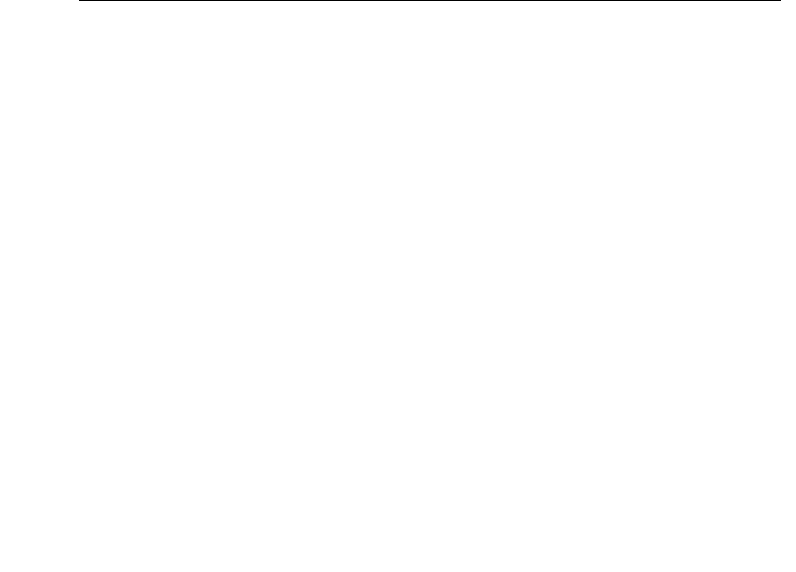

In [40]:
hist_DR_track_truth_20->Scale(1/hist_DR_track_truth_20->Integral());
hist_DR_track_truth_20->DrawNormalized("");
canvas2->Draw();

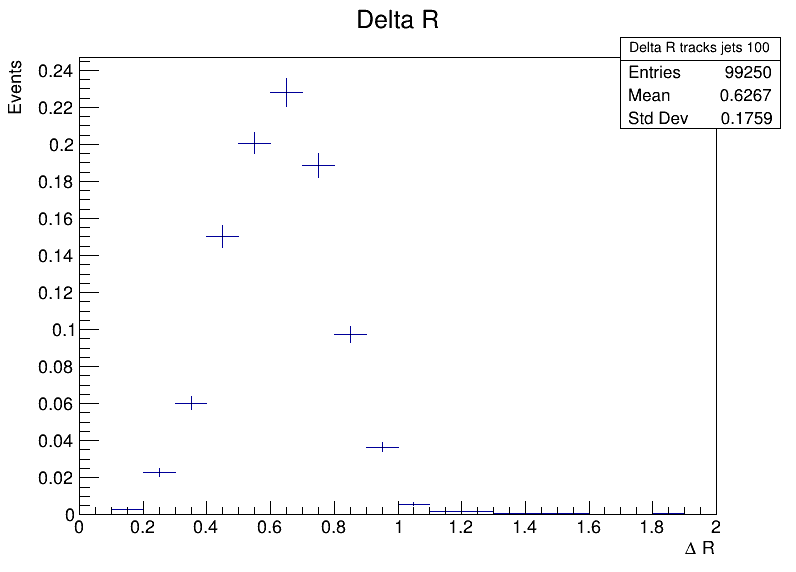

In [39]:
hist_DR_track_truth_100->Scale(1/hist_DR_track_truth_100->Integral());
hist_DR_track_truth_100->DrawNormalized("");
canvas2->Draw();

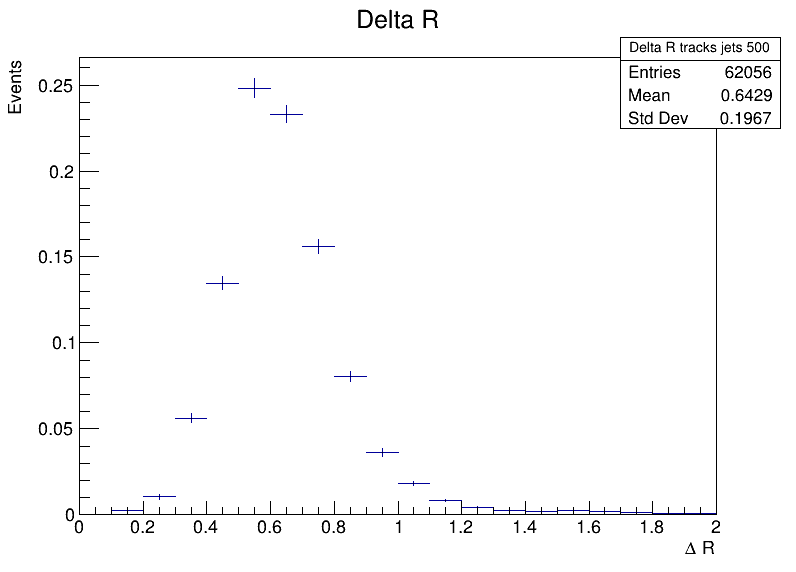

In [41]:
hist_DR_track_truth_500->Scale(1/hist_DR_track_truth_500->Integral());
hist_DR_track_truth_500->DrawNormalized("");
canvas2->Draw();

Investigate the Large-R jets: 
    (a) Plot the leading jet pT for reco_R10 and reco_R10_Trimmed jets
    (b) Plot the leading jet pT for truth_R10 and truth_R10_Trimmed jets
    (c) Compare all plots. How can you explain the differences?
    (d) Make the same comparisson for the jet mass.

In [19]:
vector<float> *reco_R10_pt;
vector<float> *reco_R10_trimmed_pt;
tree->SetBranchAddress("RecoJets_R10_pt", &reco_R10_pt);
tree->SetBranchAddress("RecoJets_R10_Trimmed_pt", &reco_R10_trimmed_pt);

In [20]:
TCanvas *canvas = new TCanvas("Canvas","",800,600);

In [25]:
TH1F *hist_leadreco_R10_pt = new TH1F("Lead Reco-jet R10","Leading jet pT; pT(GeV);Events",50,10,200);
TH1F *hist_leadreco_R10_trimmed_pt = new TH1F("Lead Reco-jet R10 Trimmed","Jet pT; pT(GeV);Events",50,10,200);

Warning in <TFile::Append>: Replacing existing TH1: Lead Reco-jet R10 (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: Lead Reco-jet R10 Trimmed (Potential memory leak).


In [26]:
int nentries, nbytes, i;
nentries = (Int_t)tree->GetEntries();

for (i = 0; i < nentries; i++)
{
    nbytes = tree->GetEntry(i);   
    if(reco_R10_pt->size()>0){
    hist_leadreco_R10_pt->Fill(reco_R10_pt->at(0)/1000.,evtw); 
    }
    if(reco_R10_trimmed_pt->size()>0){
    hist_leadreco_R10_trimmed_pt->Fill(reco_R10_trimmed_pt->at(0)/1000.,evtw); 
    }
}

std::cout << "Done!" << std::endl;

Done!


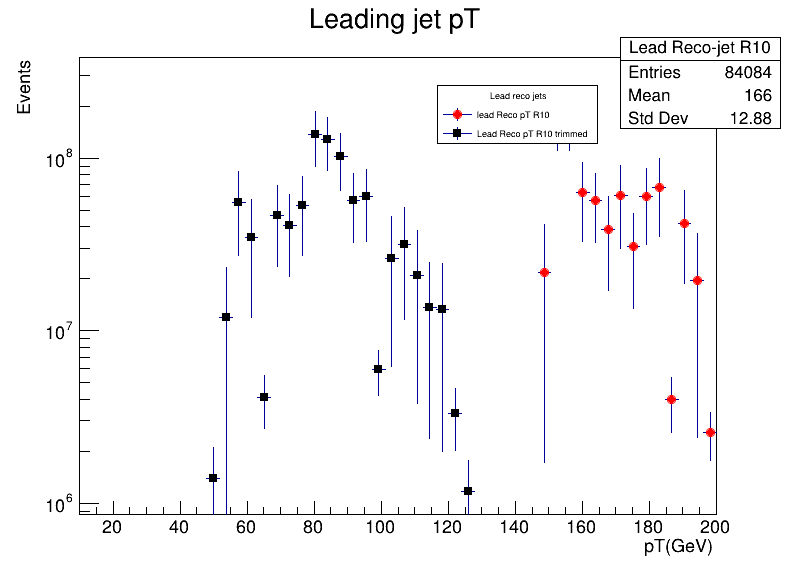

In [27]:
hist_leadreco_R10_pt->SetMarkerStyle(20);
hist_leadreco_R10_pt->SetMarkerColor(kRed);
hist_leadreco_R10_pt->Draw("");
hist_leadreco_R10_trimmed_pt->SetMarkerStyle(21);
hist_leadreco_R10_trimmed_pt->Draw("same");
auto legend = new TLegend(0.75,0.85,0.55,0.75);
   legend->SetHeader("Lead reco jets","C");
   legend->AddEntry(hist_leadreco_R10_pt,"lead Reco pT R10","lep");
   legend->AddEntry(hist_leadreco_R10_trimmed_pt,"Lead Reco pT R10 trimmed","lep");
   legend->Draw();
canvas->SetLogy();
canvas->Draw();

In [28]:
vector<float> *truth_R10_pt;
vector<float> *truth_R10_trimmed_pt;
tree->SetBranchAddress("TruthJets_R10_pt", &truth_R10_pt);
tree->SetBranchAddress("TruthJets_R10_Trimmed_pt", &truth_R10_trimmed_pt);

In [29]:
TH1F *hist_leadtruth_R10_pt = new TH1F("Lead truth-jet R10","Leading truth jet pT; pT(GeV);Events",50,10,200);
TH1F *hist_leadtruth_R10_trimmed_pt = new TH1F("Lead truth-jet R10 Trimmed","leadind truth Jet pT; pT(GeV);Events",50,10,200);

In [30]:
int nentries, nbytes, i;
nentries = (Int_t)tree->GetEntries();

for (i = 0; i < nentries; i++)
{
    nbytes = tree->GetEntry(i);   
    if(truth_R10_pt->size()>0){
    hist_leadtruth_R10_pt->Fill(truth_R10_pt->at(0)/1000.,evtw); 
    }
    if(truth_R10_trimmed_pt->size()>0){
    hist_leadtruth_R10_trimmed_pt->Fill(truth_R10_trimmed_pt->at(0)/1000.,evtw); 
    }
}

std::cout << "Done!" << std::endl;

Done!


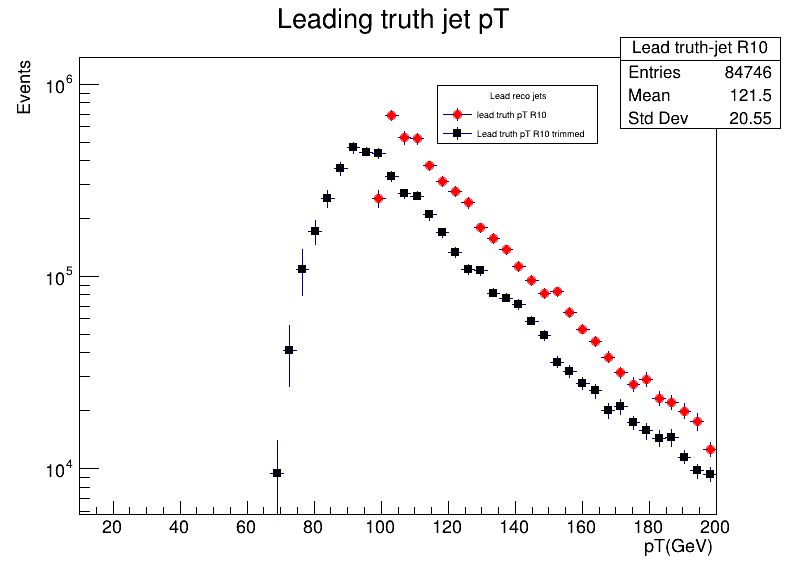

In [31]:
hist_leadtruth_R10_pt->SetMarkerStyle(20);
hist_leadtruth_R10_pt->SetMarkerColor(kRed);
hist_leadtruth_R10_pt->Draw("");
hist_leadtruth_R10_trimmed_pt->SetMarkerStyle(21);
hist_leadtruth_R10_trimmed_pt->Draw("same");
auto legend = new TLegend(0.75,0.85,0.55,0.75);
   legend->SetHeader("Lead reco jets","C");
   legend->AddEntry(hist_leadtruth_R10_pt,"lead truth pT R10","lep");
   legend->AddEntry(hist_leadtruth_R10_trimmed_pt,"Lead truth pT R10 trimmed","lep");
   legend->Draw();
canvas->SetLogy();
canvas->Draw();